Name: Md. Tasin Hossain Toha
ID: 2011664042

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('/Users/xenda/445/Egyptian Patients Dataset/HCV-Egy-Data.csv')
print(df)

      Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
0       56       1   35      2               1          1          1   
1       46       1   29      1               2          2          1   
2       57       1   33      2               2          2          2   
3       49       2   33      1               2          1          2   
4       59       1   32      1               1          2          1   
...    ...     ...  ...    ...             ...        ...        ...   
1380    44       1   29      1               2          2          2   
1381    55       1   34      1               2          2          1   
1382    42       1   26      2               2          1          1   
1383    52       1   29      2               1          1          2   
1384    55       2   26      1               2          2          2   

      Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
0                                    2          2          

In [11]:
df.drop_duplicates(inplace = True)
print(df)

      Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
0       56       1   35      2               1          1          1   
1       46       1   29      1               2          2          1   
2       57       1   33      2               2          2          2   
3       49       2   33      1               2          1          2   
4       59       1   32      1               1          2          1   
...    ...     ...  ...    ...             ...        ...        ...   
1380    44       1   29      1               2          2          2   
1381    55       1   34      1               2          2          1   
1382    42       1   26      2               2          1          1   
1383    52       1   29      2               1          1          2   
1384    55       2   26      1               2          2          2   

      Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
0                                    2          2          

In [12]:
df.isnull().sum()

Age                                 0
Gender                              0
BMI                                 0
Fever                               0
Nausea/Vomting                      0
Headache                            0
Diarrhea                            0
Fatigue & generalized bone ache     0
Jaundice                            0
Epigastric pain                     0
WBC                                 0
RBC                                 0
HGB                                 0
Plat                                0
AST 1                               0
ALT 1                               0
ALT4                                0
ALT 12                              0
ALT 24                              0
ALT 36                              0
ALT 48                              0
ALT after 24 w                      0
RNA Base                            0
RNA 4                               0
RNA 12                              0
RNA EOT                             0
RNA EF      

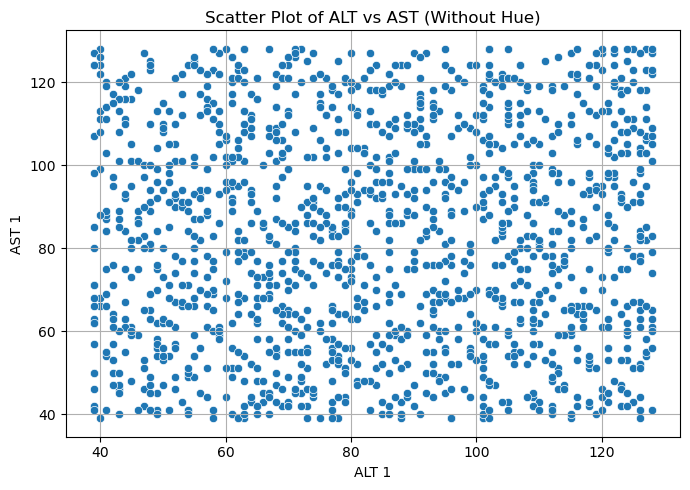

In [15]:
# Step 1: Map 'Baselinehistological staging' to binary classes
df["Stage_binary"] = df["Baselinehistological staging"].map({
    1: 0,  # F1 → early
    2: 0,  # F2 → moderate
    3: 1,  # F3 → advanced
    4: 1   # F4 → cirrhosis
})

# Step 2: Drop rows with missing values in key columns
df_plot = df.dropna(subset=["ALT 1", "AST 1", "Stage_binary"])

### Scatter Plot WITHOUT hue
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_plot, x="ALT 1", y="AST 1")
plt.title("Scatter Plot of ALT vs AST (Without Hue)")
plt.xlabel("ALT 1")
plt.ylabel("AST 1")
plt.grid(True)
plt.tight_layout()
plt.show()


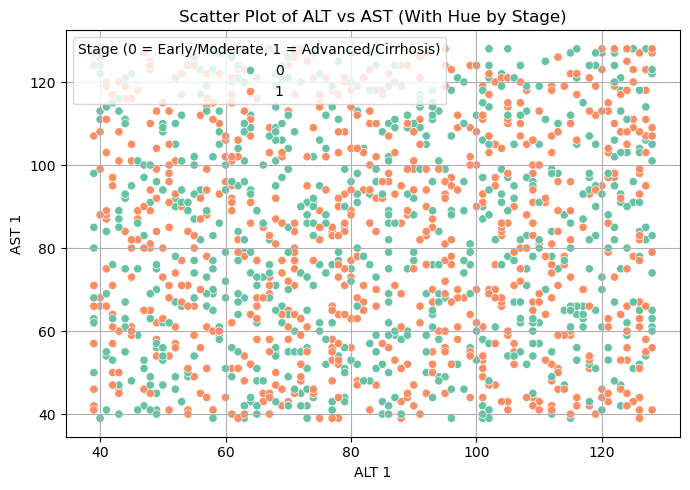

In [16]:
### Scatter Plot WITH hue
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_plot, x="ALT 1", y="AST 1", hue="Stage_binary", palette="Set2")
plt.title("Scatter Plot of ALT vs AST (With Hue by Stage)")
plt.xlabel("ALT 1")
plt.ylabel("AST 1")
plt.legend(title="Stage (0 = Early/Moderate, 1 = Advanced/Cirrhosis)")
plt.grid(True)
plt.tight_layout()
plt.show()


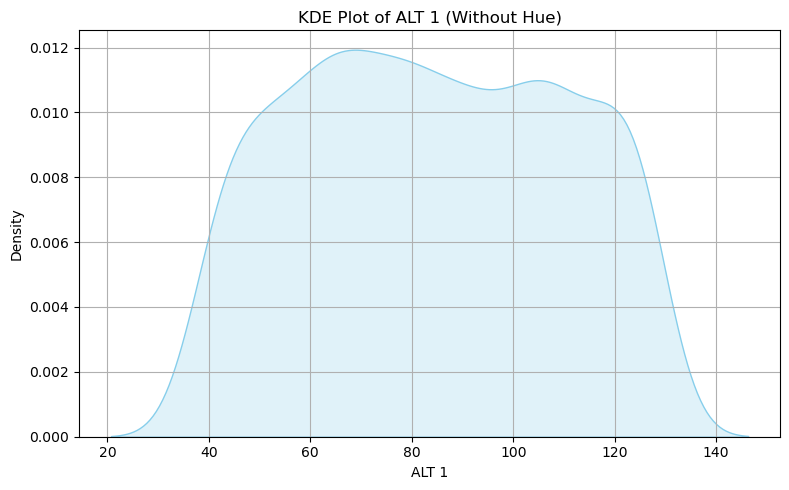

In [17]:
# Drop missing values in ALT 1
df_kde = df.dropna(subset=["ALT 1"])

### KDE plot without  hue
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df_kde, x="ALT 1", fill=True, color="skyblue")
plt.title("KDE Plot of ALT 1 (Without Hue)")
plt.xlabel("ALT 1")
plt.ylabel("Density")
plt.grid(True)
plt.tight_layout()
plt.show()


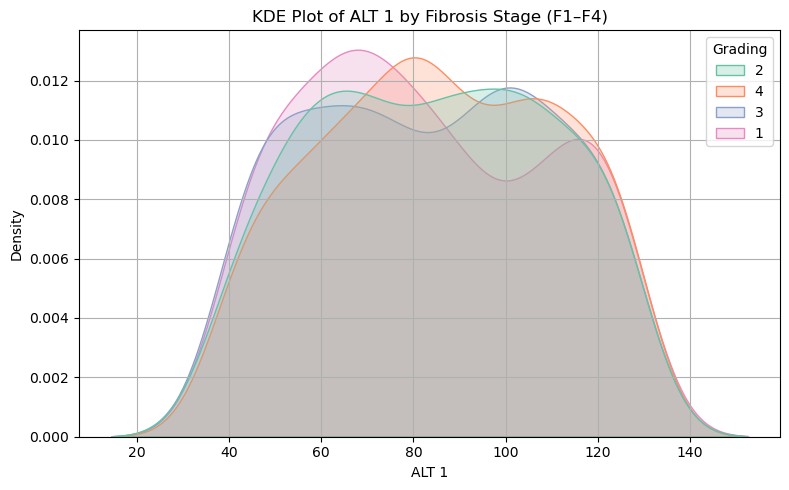

In [18]:
# Drop rows with missing values in both ALT 1 and Baselinehistological staging
df_kde_hue = df.dropna(subset=["ALT 1", "Baselinehistological staging"]).copy()

# Convert staging column to string for hue
df_kde_hue["Grading"] = df_kde_hue["Baselinehistological staging"].astype(str)

### KDE plot with hue
plt.figure(figsize=(8, 5))
sns.kdeplot(
    data=df_kde_hue,
    x="ALT 1",
    hue="Grading",
    fill=True,
    palette="Set2",
    common_norm=False
)
plt.title("KDE Plot of ALT 1 by Fibrosis Stage (F1–F4)")
plt.xlabel("ALT 1")
plt.ylabel("Density")
plt.grid(True)
plt.tight_layout()
plt.show()


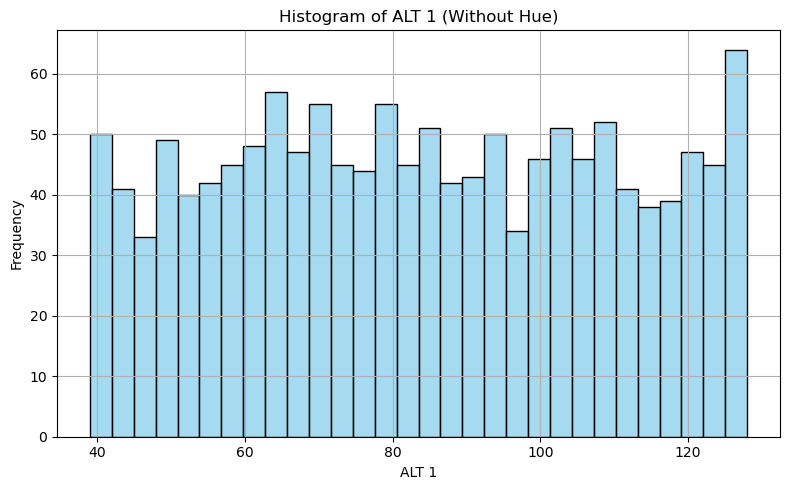

In [20]:
# Drop missing ALT 1 values
df_hist = df.dropna(subset=["ALT 1"])

### Plot Histogram without hue
plt.figure(figsize=(8, 5))
sns.histplot(data=df_hist, x="ALT 1", bins=30, color="skyblue")
plt.title("Histogram of ALT 1 (Without Hue)")
plt.xlabel("ALT 1")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


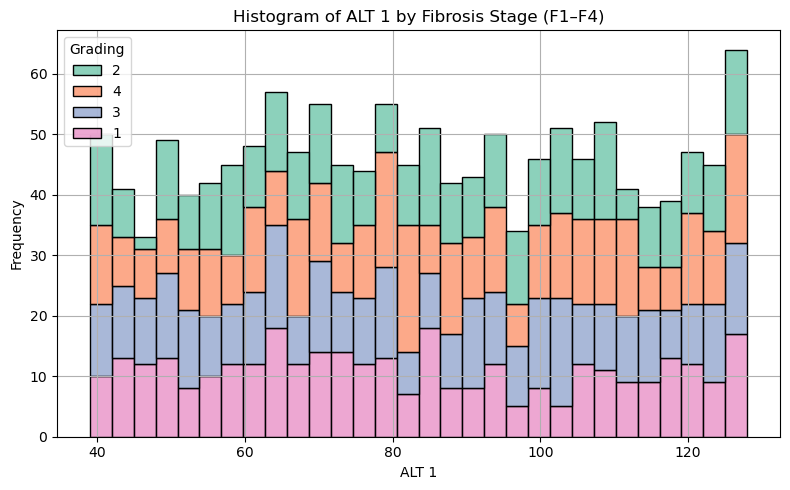

In [21]:
# Drop missing values in ALT 1 and Baselinehistological staging
df_hist_hue = df.dropna(subset=["ALT 1", "Baselinehistological staging"]).copy()

# Convert to string for hue separation
df_hist_hue["Grading"] = df_hist_hue["Baselinehistological staging"].astype(str)

### Plot Histogram with hue
plt.figure(figsize=(8, 5))
sns.histplot(
    data=df_hist_hue,
    x="ALT 1",
    hue="Grading",
    bins=30,
    palette="Set2",
    multiple="stack"
)
plt.title("Histogram of ALT 1 by Fibrosis Stage (F1–F4)")
plt.xlabel("ALT 1")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


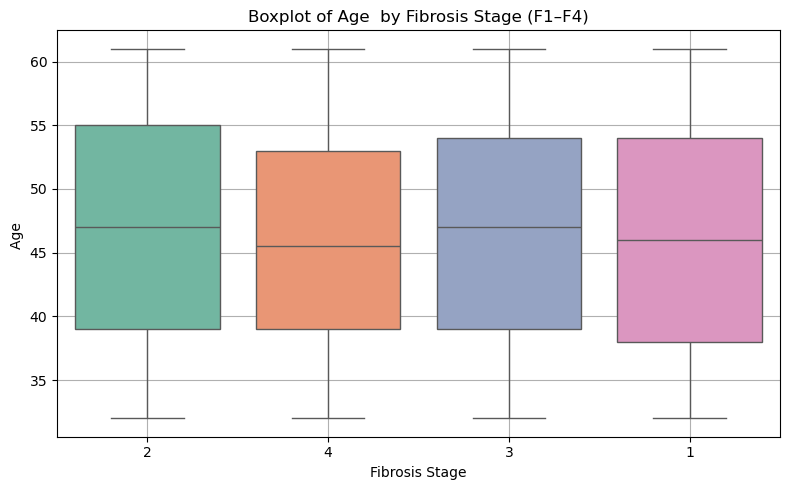

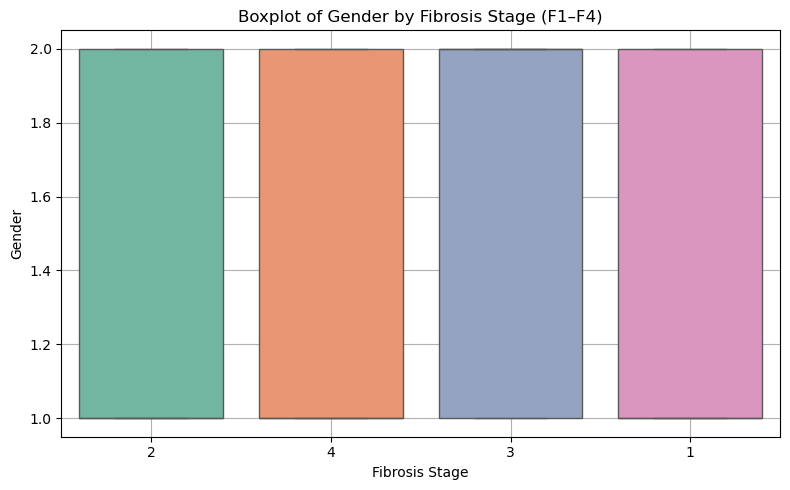

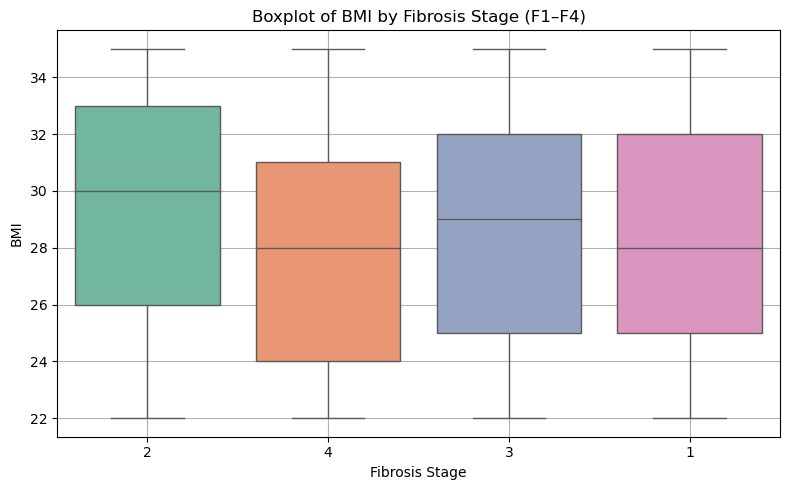

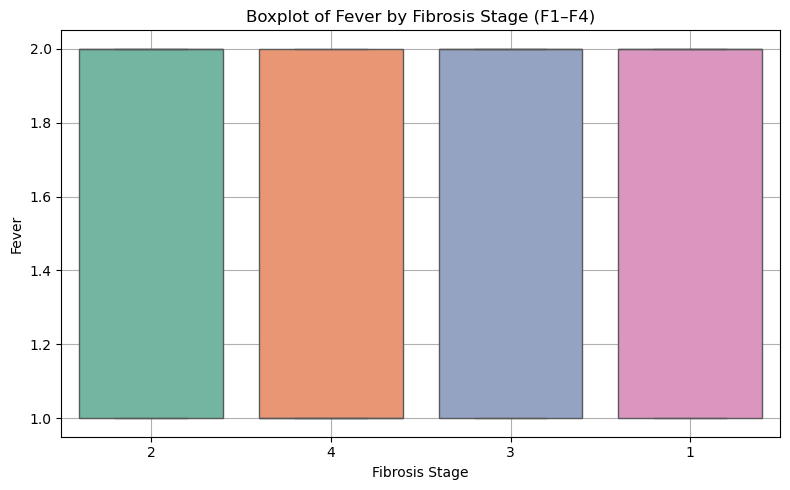

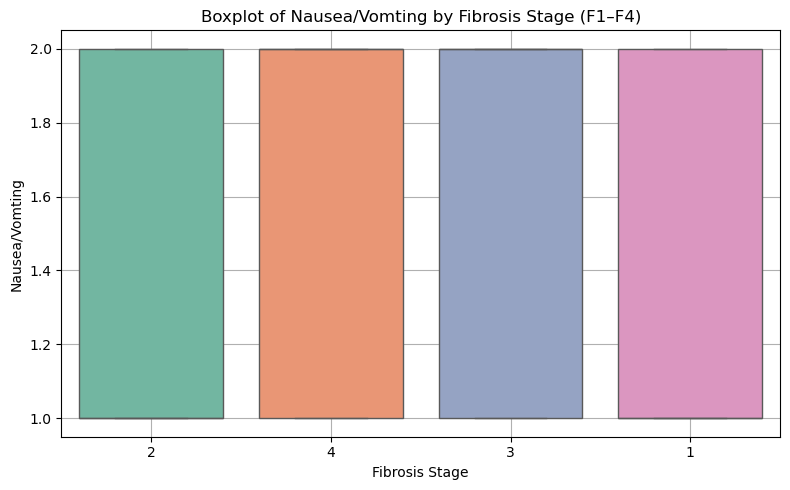

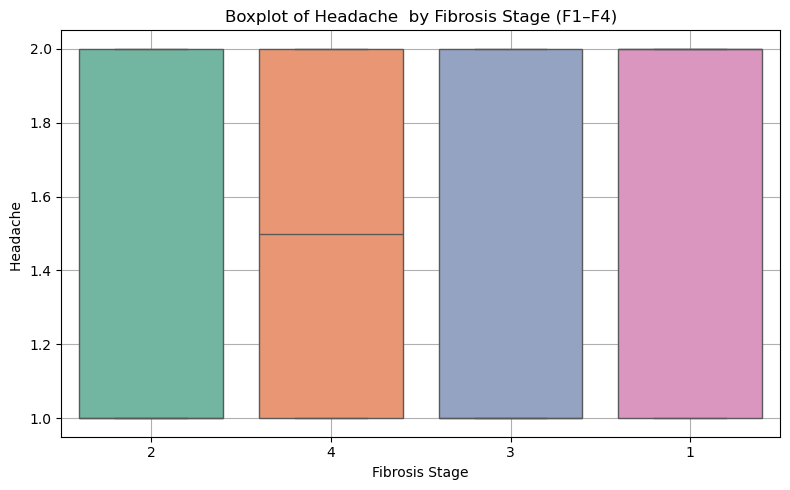

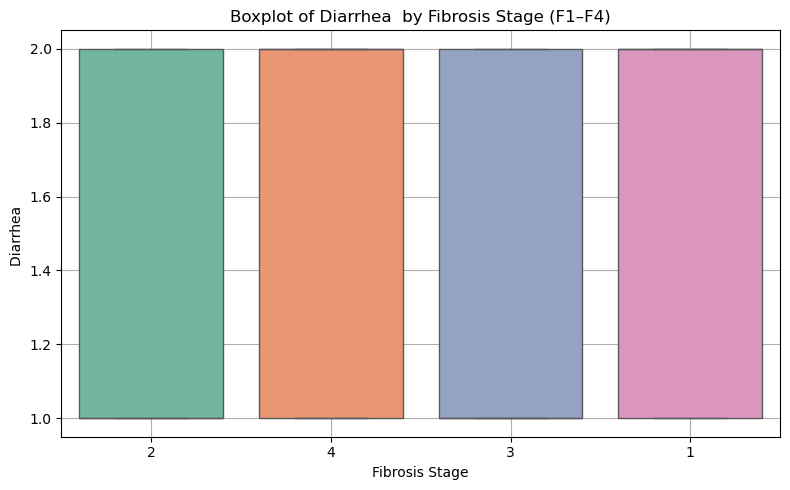

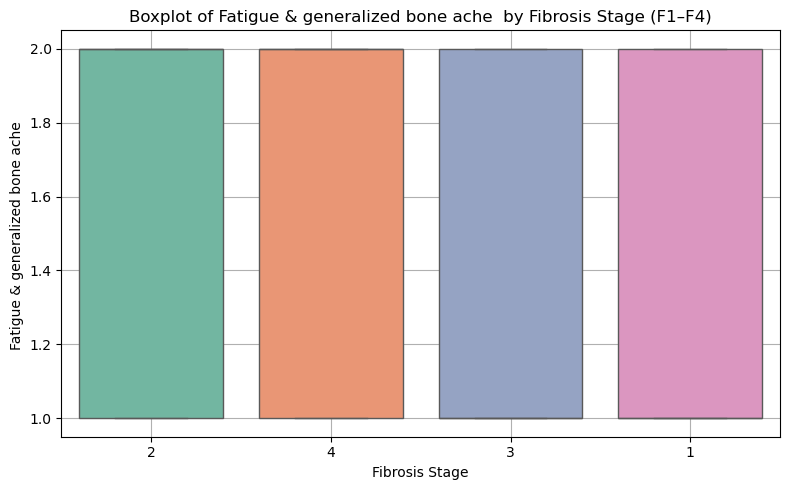

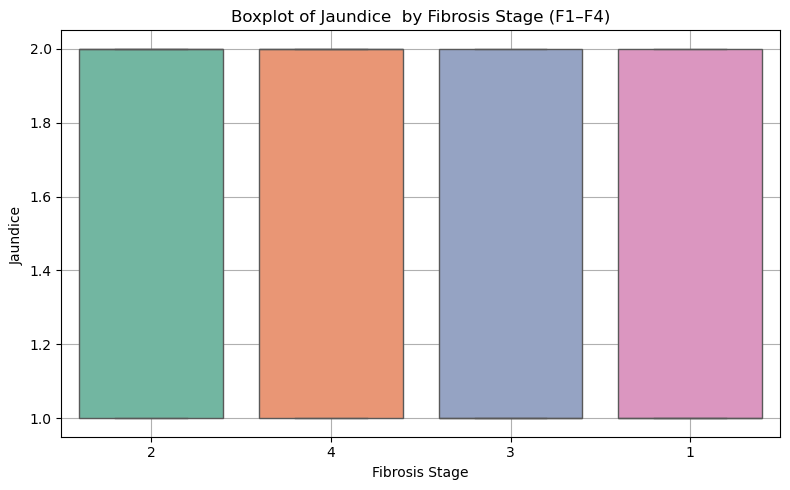

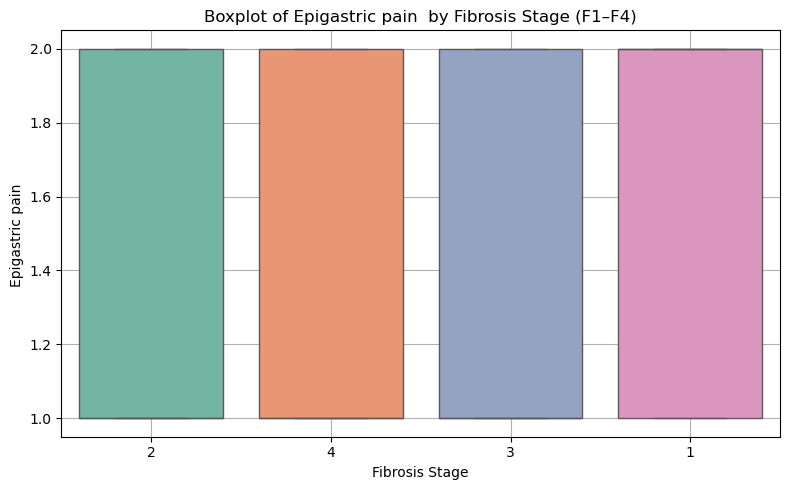

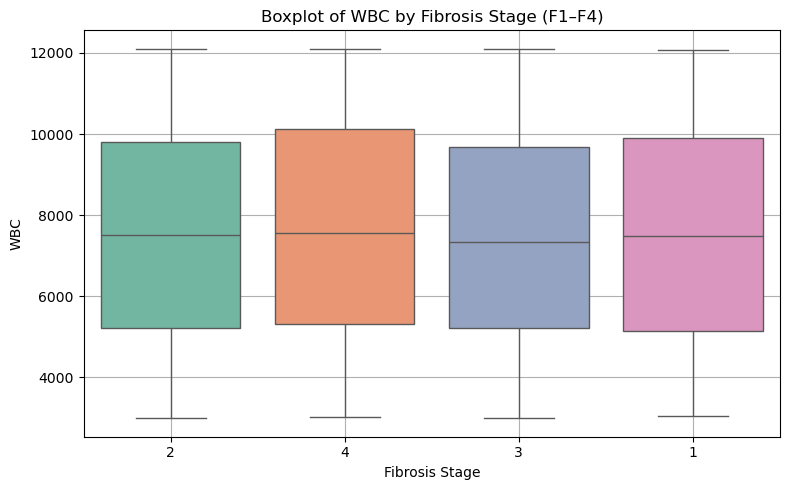

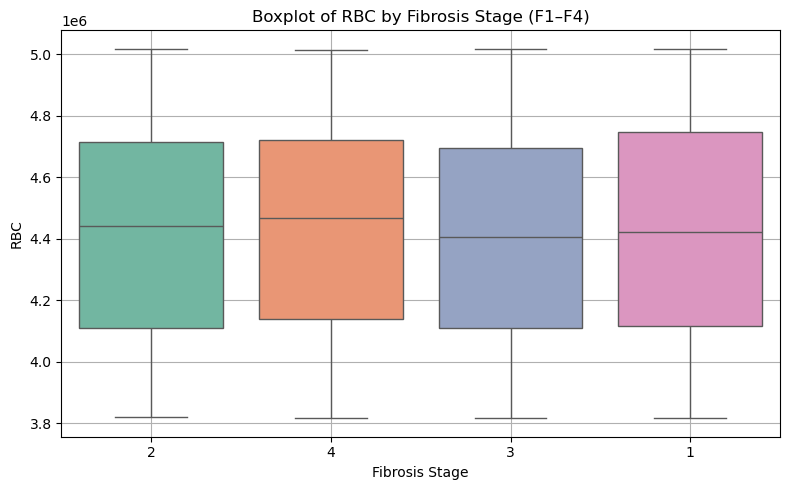

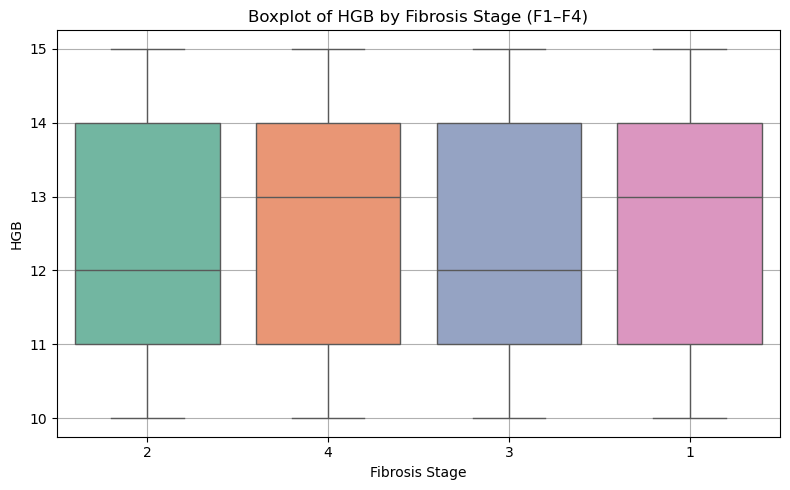

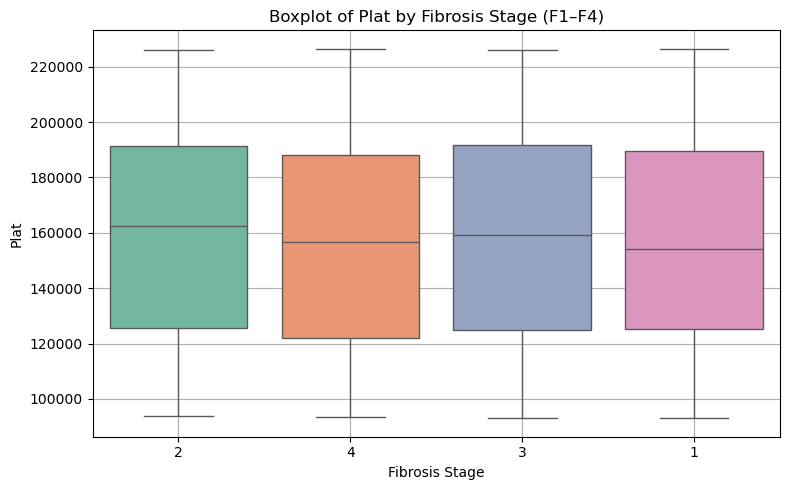

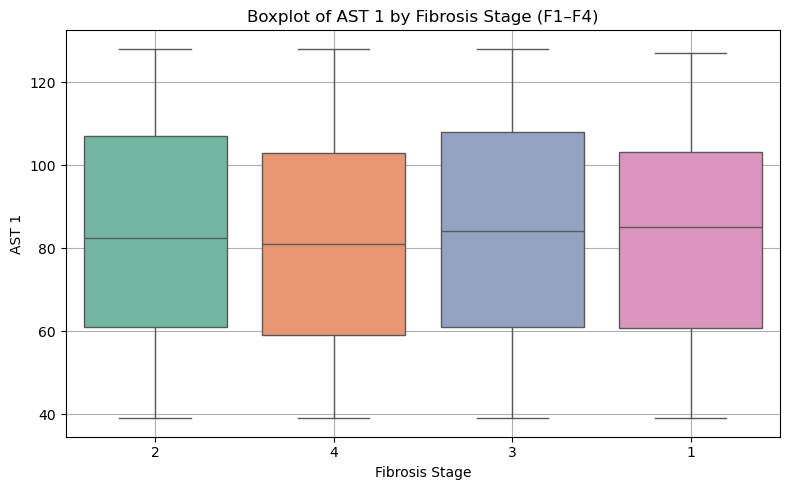

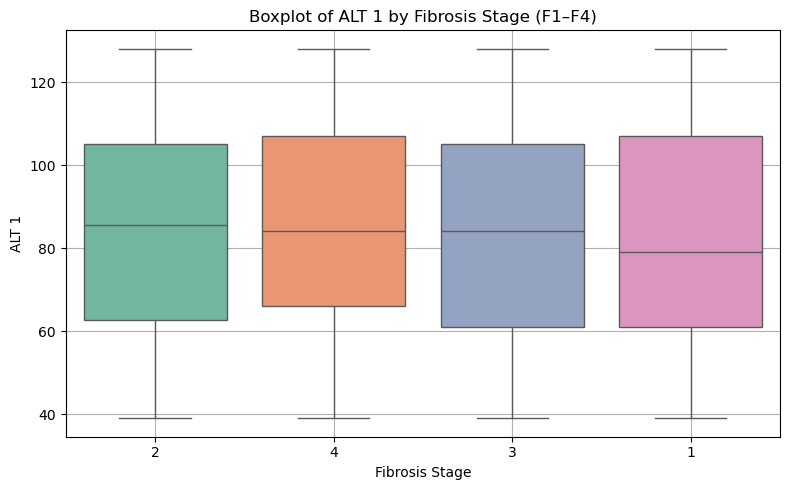

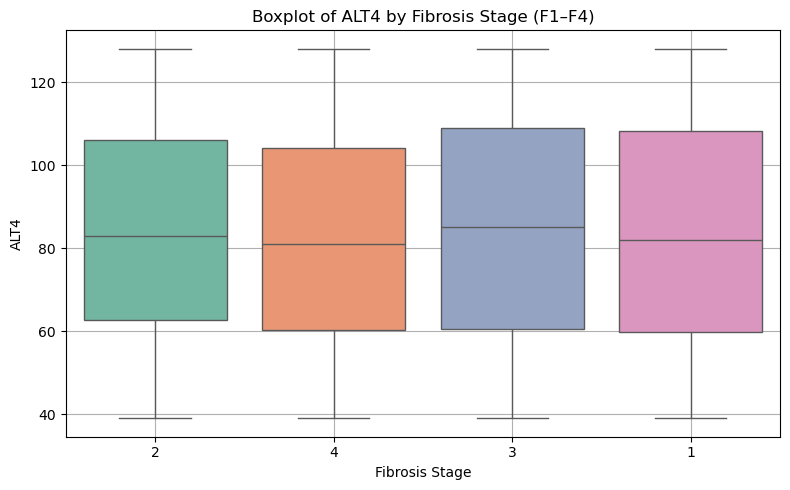

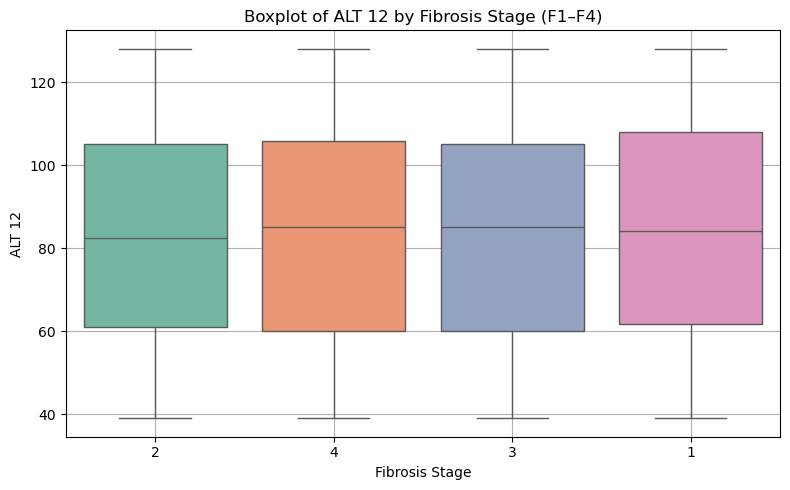

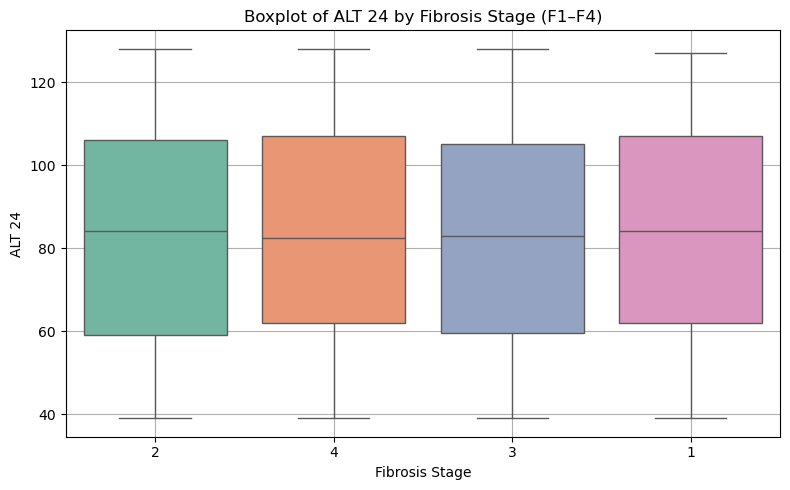

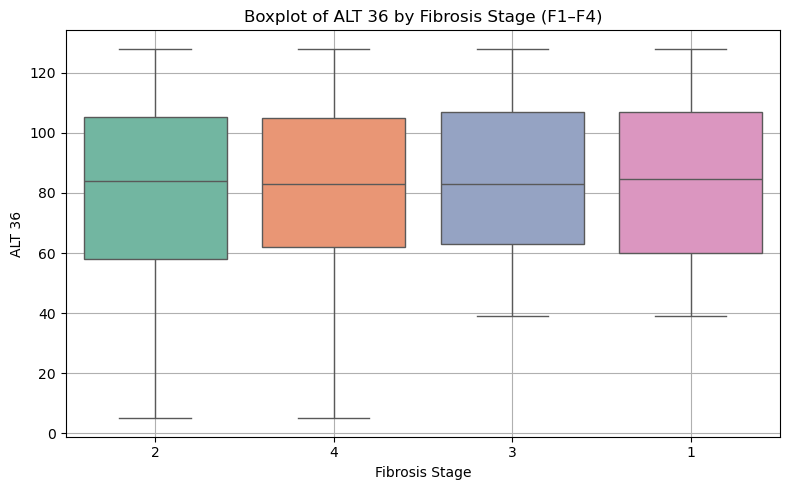

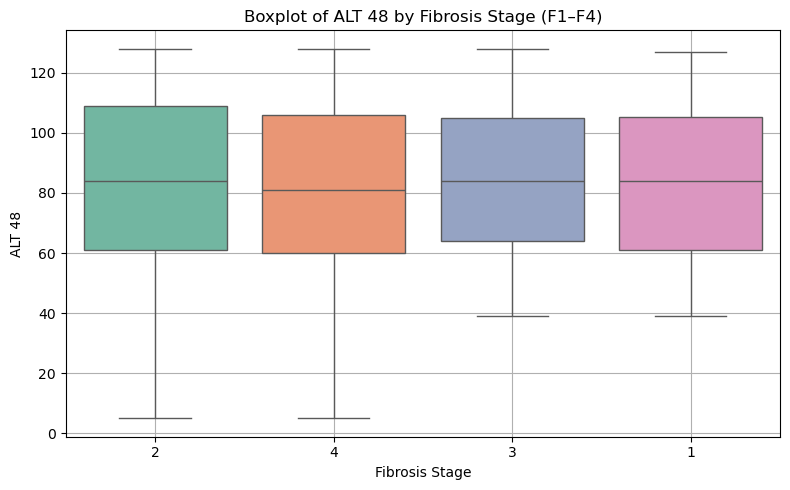

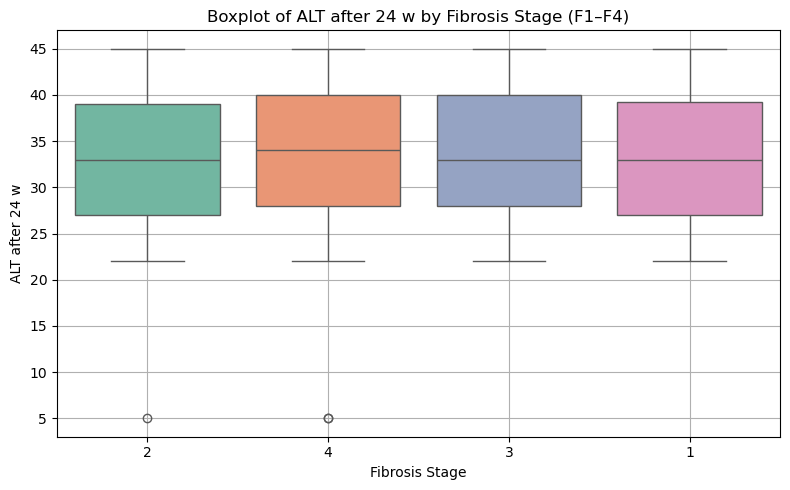

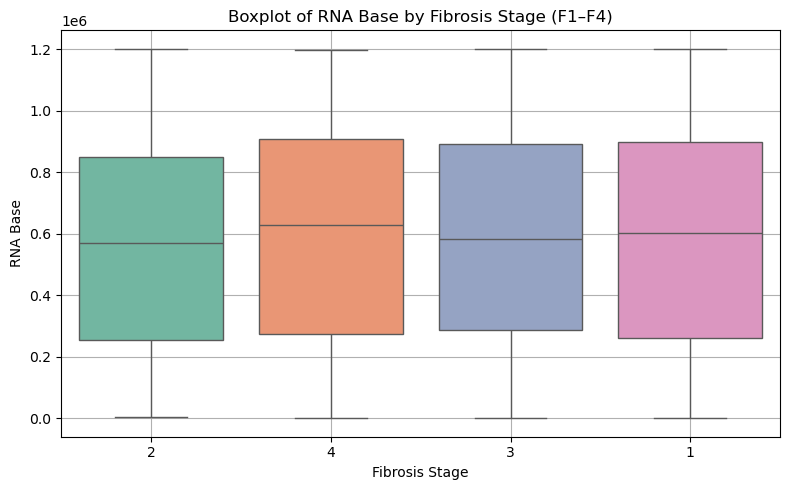

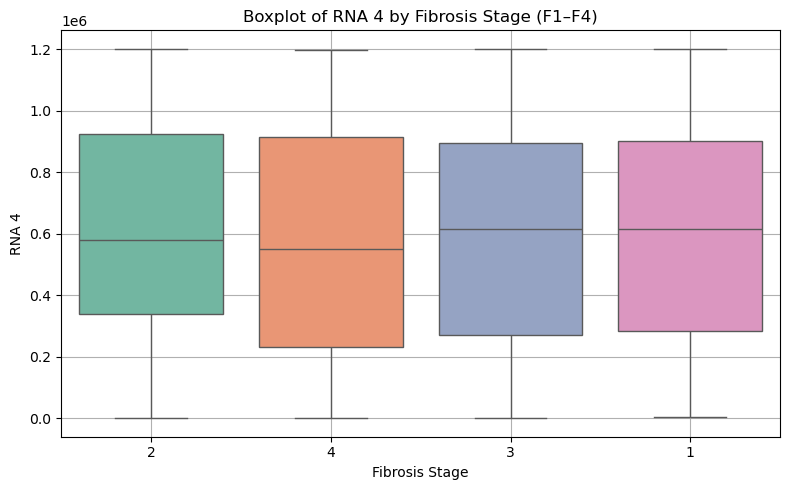

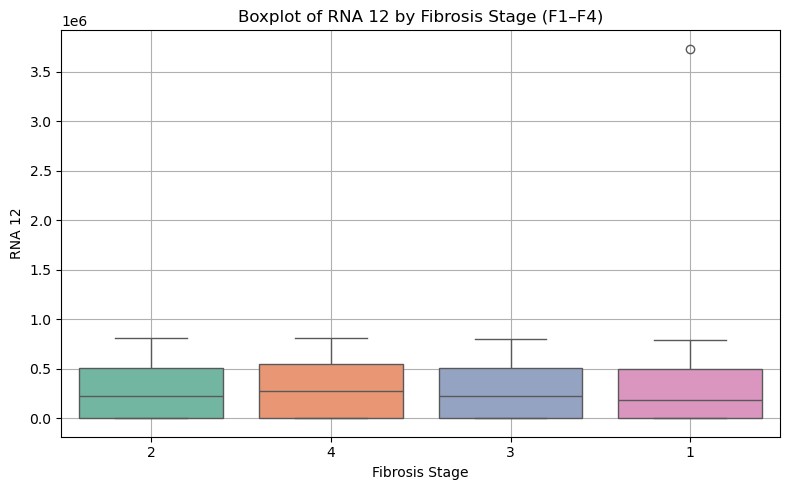

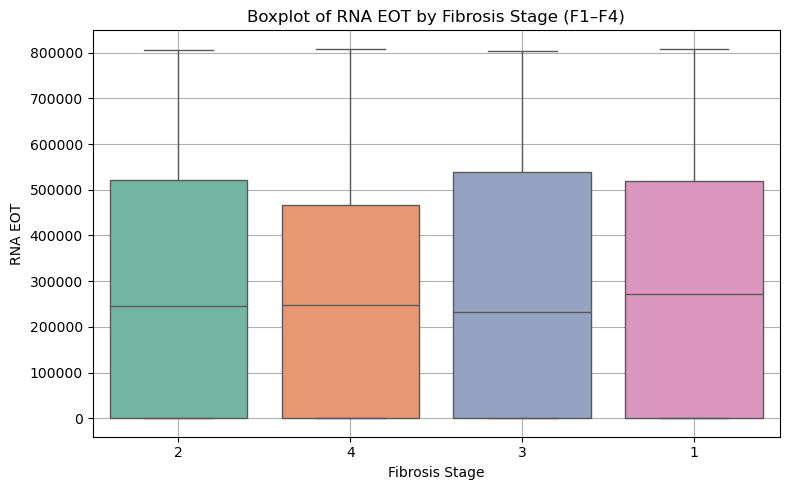

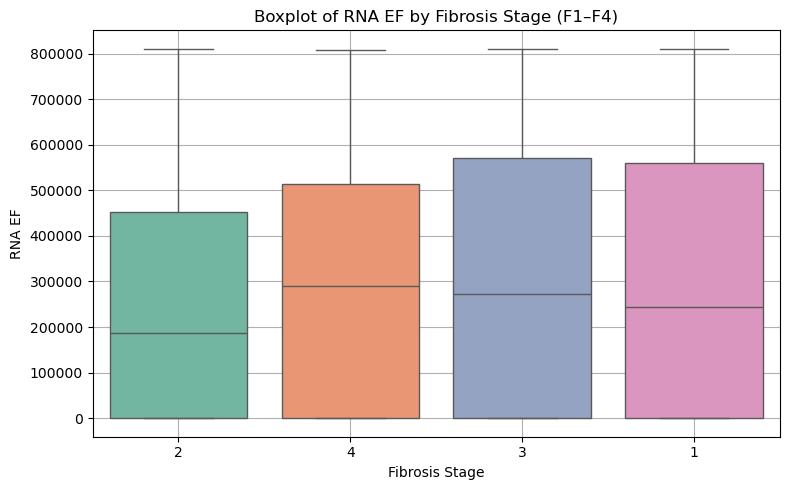

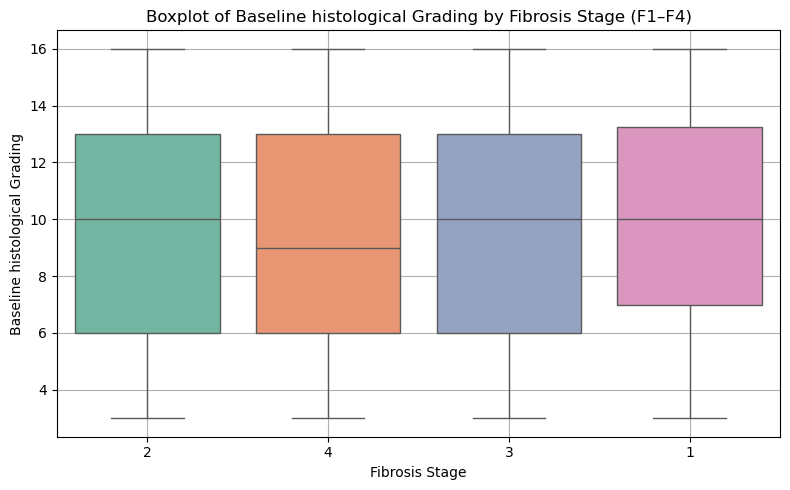

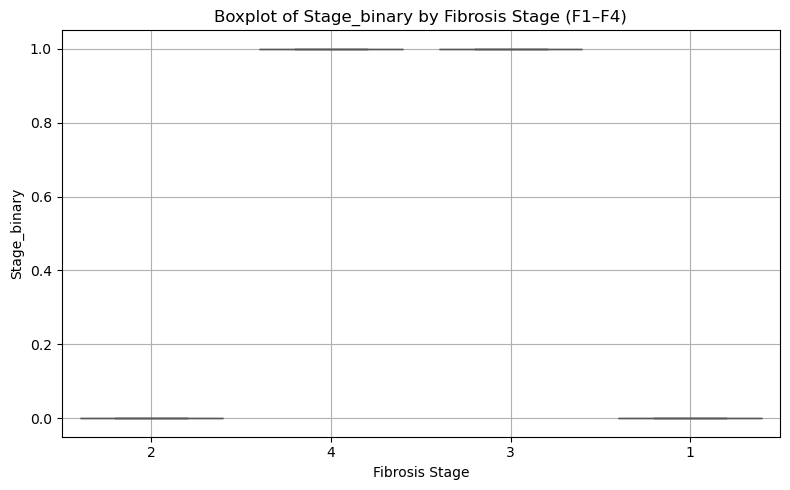

In [22]:
# Drop rows with missing target
df_box = df.dropna(subset=["Baselinehistological staging"]).copy()

# Convert the staging to string for categorical plotting
df_box["Stage"] = df_box["Baselinehistological staging"].astype(str)

# Select only numeric features (excluding the target)
numeric_features = df_box.select_dtypes(include='number').drop(columns=["Baselinehistological staging"])

### Plot Boxplots for each feature
for feature in numeric_features.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_box, x="Stage", y=feature, hue="Stage", palette="Set2", legend=False)
    plt.title(f"Boxplot of {feature} by Fibrosis Stage (F1–F4)")
    plt.xlabel("Fibrosis Stage")
    plt.ylabel(feature)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


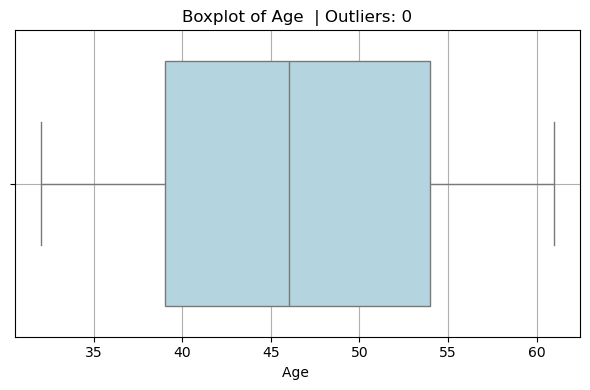

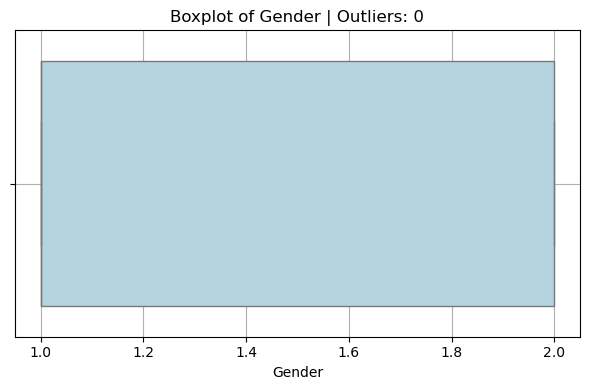

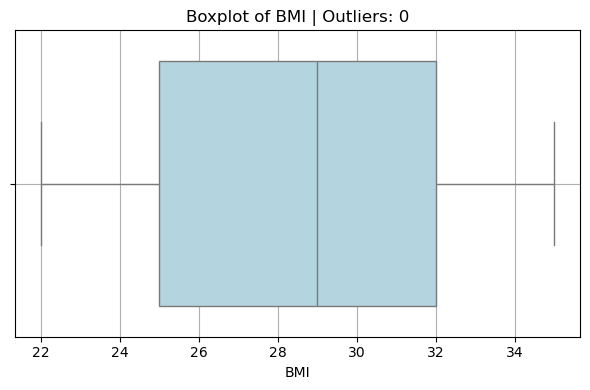

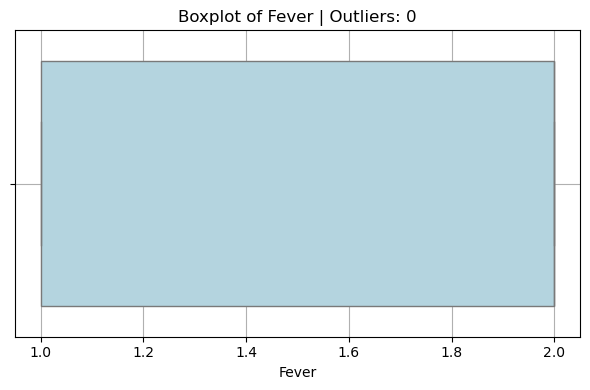

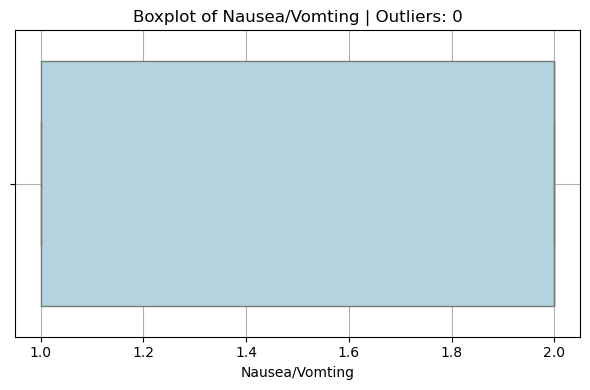

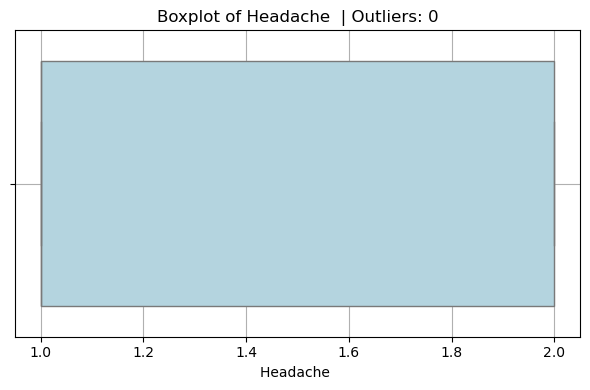

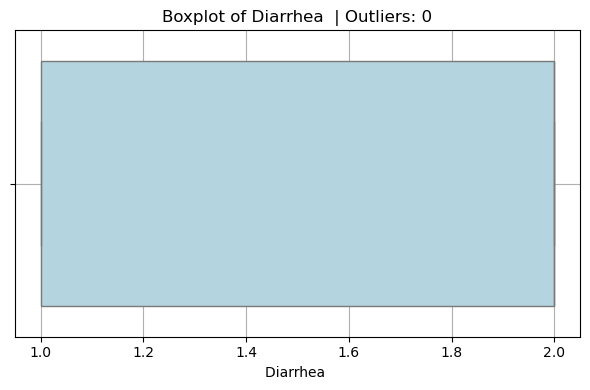

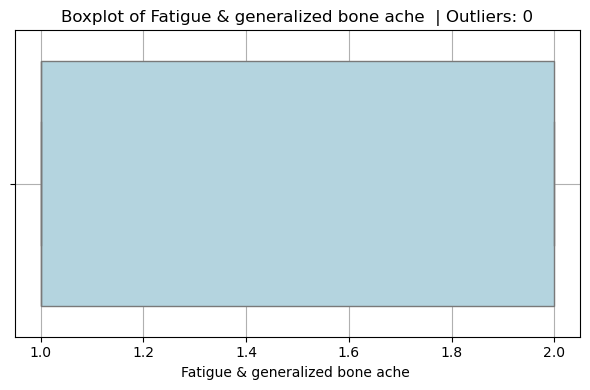

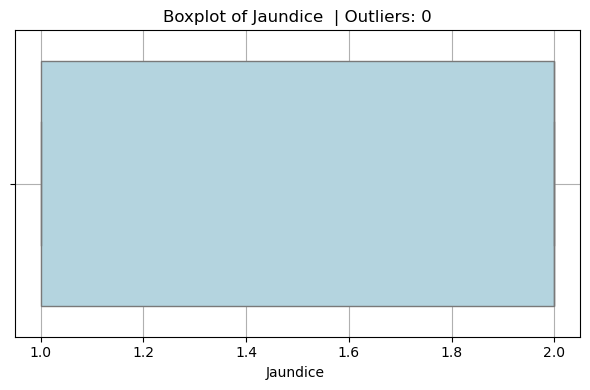

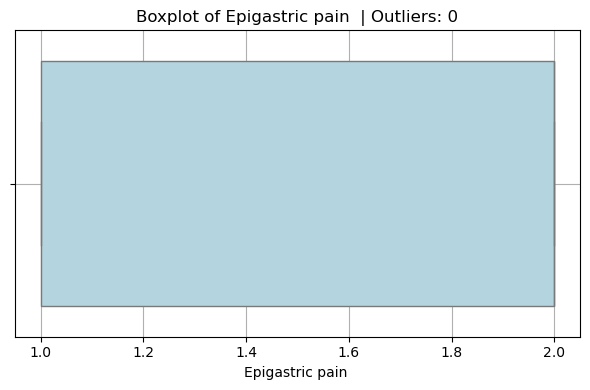

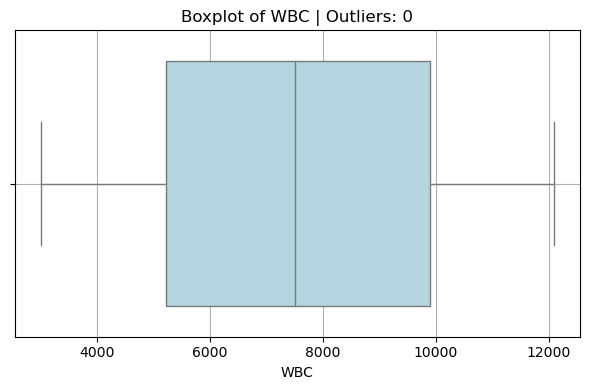

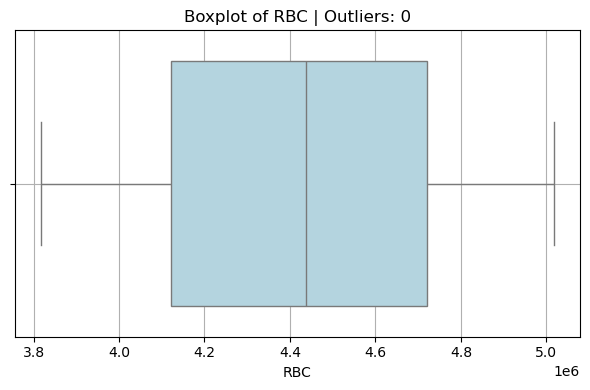

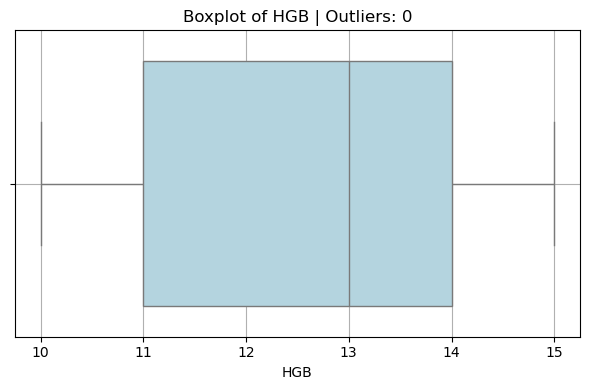

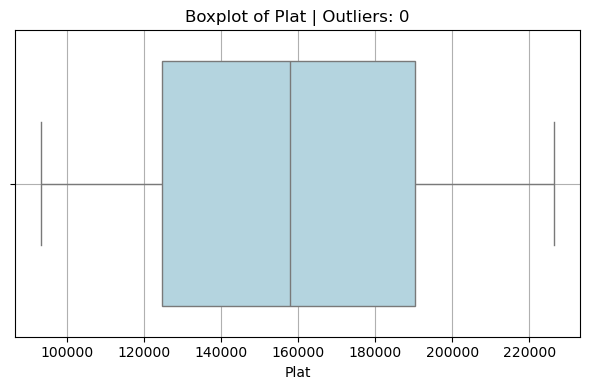

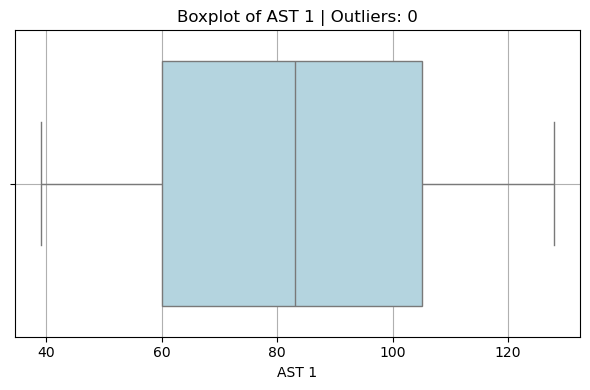

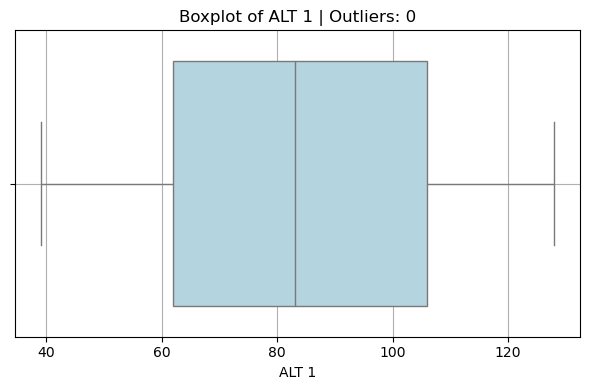

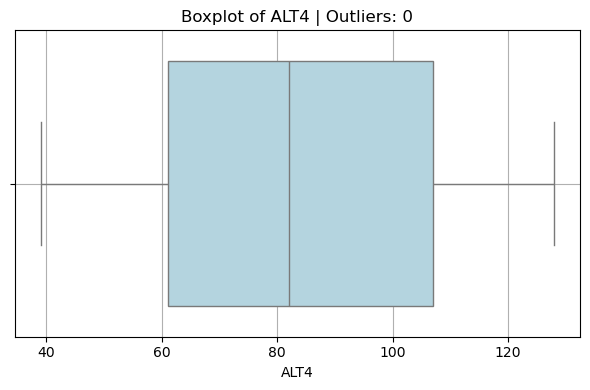

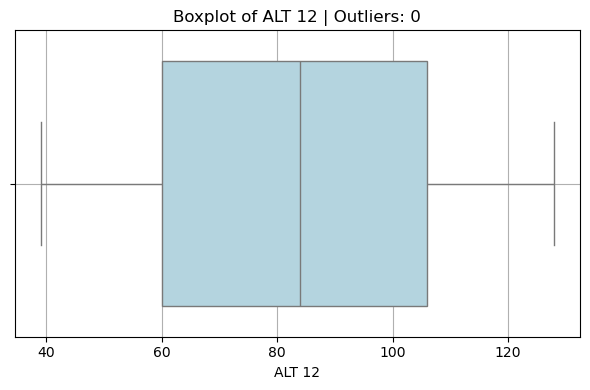

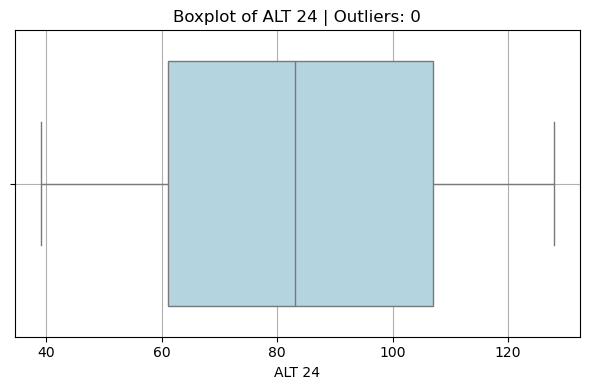

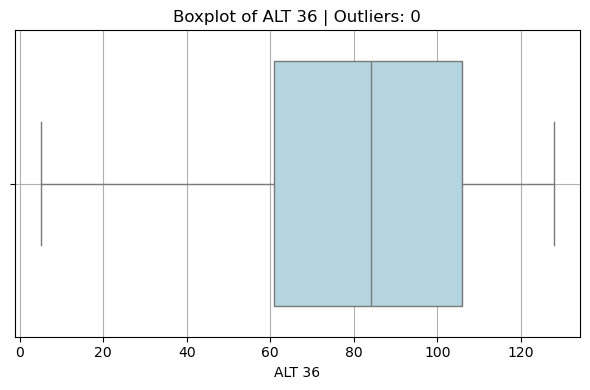

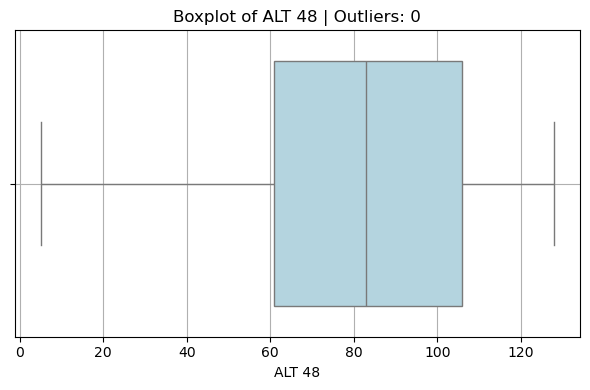

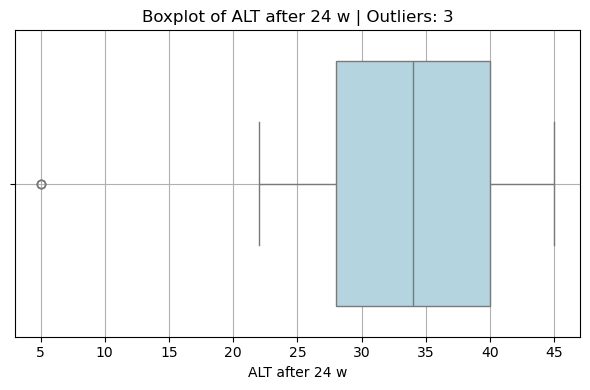

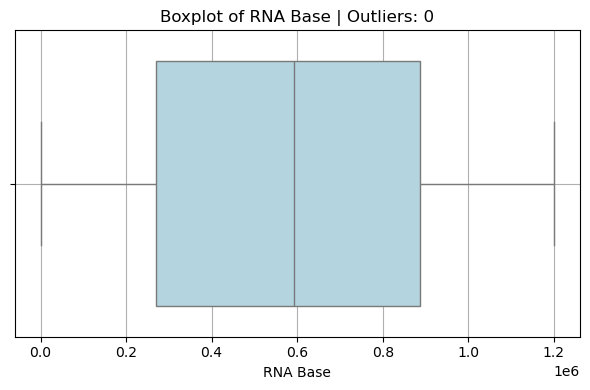

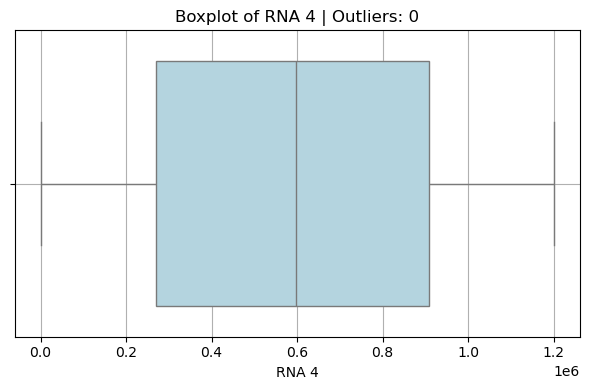

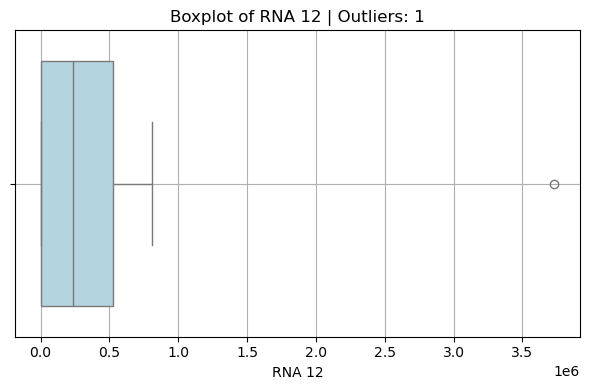

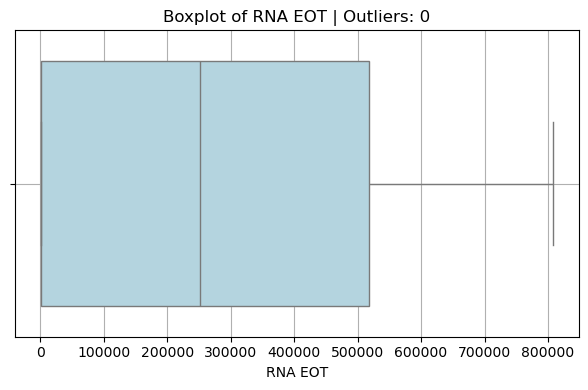

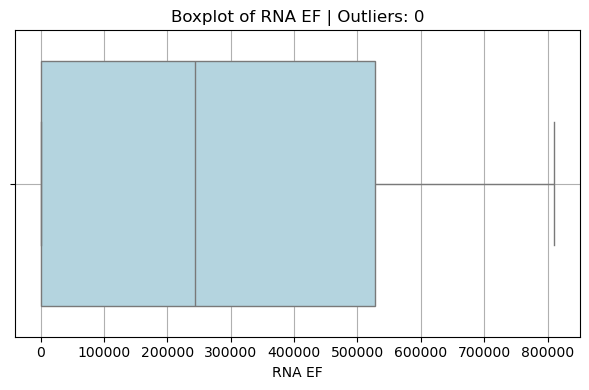

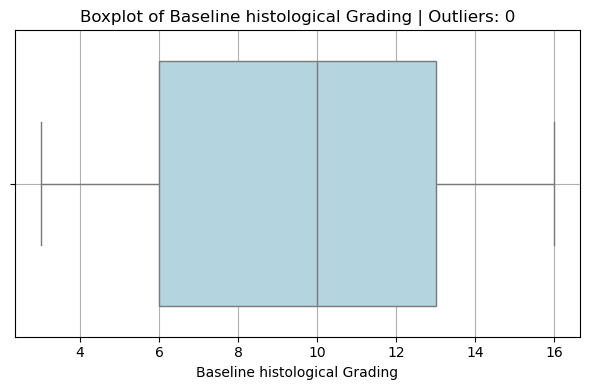

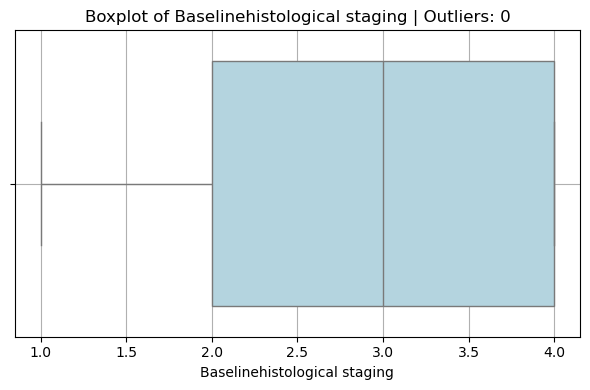

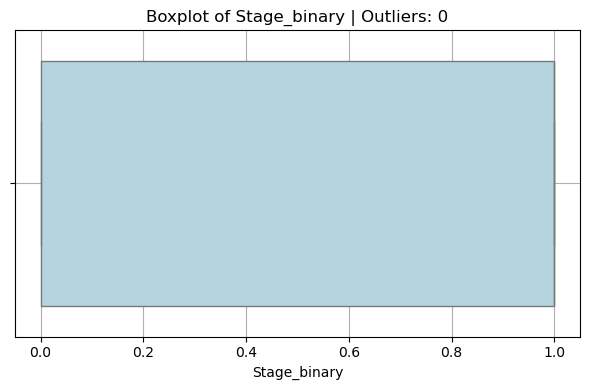


🔎 Outlier Count Per Feature (IQR Method):
Age : 0 outliers
Gender: 0 outliers
BMI: 0 outliers
Fever: 0 outliers
Nausea/Vomting: 0 outliers
Headache : 0 outliers
Diarrhea : 0 outliers
Fatigue & generalized bone ache : 0 outliers
Jaundice : 0 outliers
Epigastric pain : 0 outliers
WBC: 0 outliers
RBC: 0 outliers
HGB: 0 outliers
Plat: 0 outliers
AST 1: 0 outliers
ALT 1: 0 outliers
ALT4: 0 outliers
ALT 12: 0 outliers
ALT 24: 0 outliers
ALT 36: 0 outliers
ALT 48: 0 outliers
ALT after 24 w: 3 outliers
RNA Base: 0 outliers
RNA 4: 0 outliers
RNA 12: 1 outliers
RNA EOT: 0 outliers
RNA EF: 0 outliers
Baseline histological Grading: 0 outliers
Baselinehistological staging: 0 outliers
Stage_binary: 0 outliers


In [23]:
# Select only numerical features
numeric_df = df.select_dtypes(include='number')

# Detect outliers and show boxplots
outlier_counts = {}

for feature in numeric_df.columns:
    # Drop NaNs for this feature
    values = df[feature].dropna()

    # Calculate IQR
    Q1 = values.quantile(0.25)
    Q3 = values.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outliers = values[(values < lower_bound) | (values > upper_bound)]
    outlier_counts[feature] = len(outliers)

    # Boxplot for the feature
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=values, color="lightblue")
    plt.title(f"Boxplot of {feature} | Outliers: {len(outliers)}")
    plt.xlabel(feature)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Display summary of outliers per feature
print("\n🔎 Outlier Count Per Feature (IQR Method):")
for feature, count in outlier_counts.items():
    print(f"{feature}: {count} outliers")


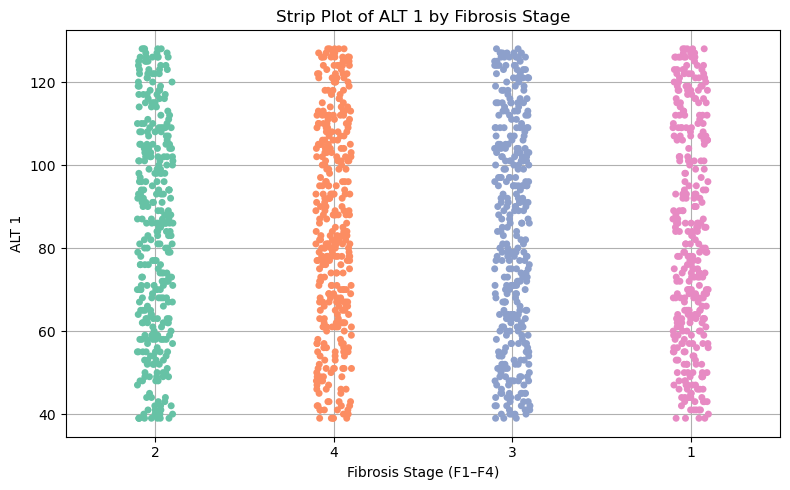

In [24]:
# Drop missing values
df_strip = df.dropna(subset=["ALT 1", "Baselinehistological staging"]).copy()
df_strip["Stage"] = df_strip["Baselinehistological staging"].astype(str)

# Strip plot with hue and no legend
plt.figure(figsize=(8, 5))
sns.stripplot(
    data=df_strip,
    x="Stage",
    y="ALT 1",
    hue="Stage",
    palette="Set2",
    jitter=True,
    legend=False
)
plt.title("Strip Plot of ALT 1 by Fibrosis Stage")
plt.xlabel("Fibrosis Stage (F1–F4)")
plt.ylabel("ALT 1")
plt.grid(True)
plt.tight_layout()
plt.show()


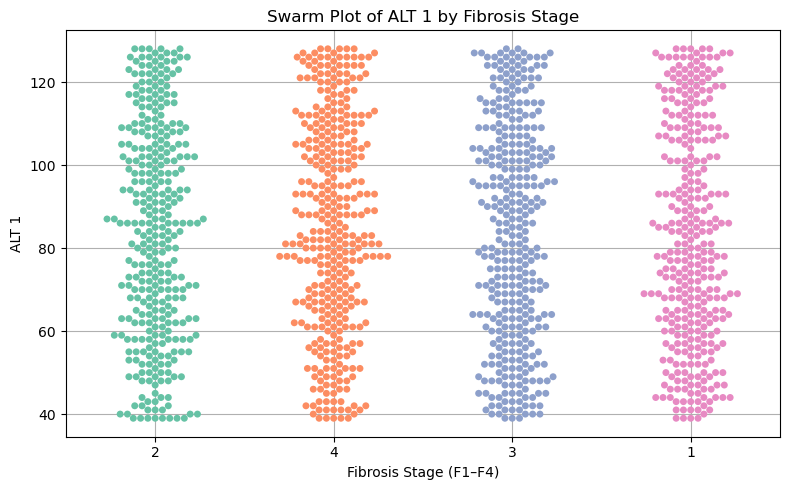

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop missing values
df_swarm = df.dropna(subset=["ALT 1", "Baselinehistological staging"]).copy()
df_swarm["Stage"] = df_swarm["Baselinehistological staging"].astype(str)

### Swarm plot with hue and no legend
plt.figure(figsize=(8, 5))
sns.swarmplot(
    data=df_swarm,
    x="Stage",
    y="ALT 1",
    hue="Stage",
    palette="Set2",
    dodge=False,
    legend=False
)
plt.title("Swarm Plot of ALT 1 by Fibrosis Stage")
plt.xlabel("Fibrosis Stage (F1–F4)")
plt.ylabel("ALT 1")
plt.grid(True)
plt.tight_layout()
plt.show()


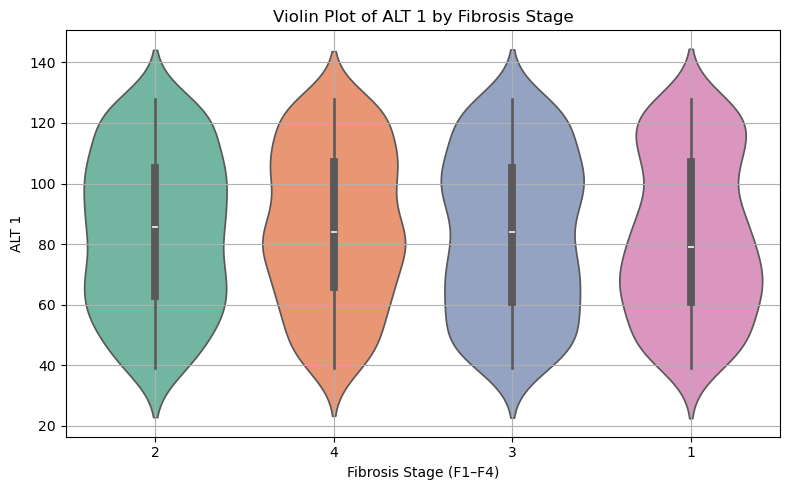

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop missing values
df_violin = df.dropna(subset=["ALT 1", "Baselinehistological staging"]).copy()
df_violin["Stage"] = df_violin["Baselinehistological staging"].astype(str)

# Violin plot with hue and no legend
plt.figure(figsize=(8, 5))
sns.violinplot(
    data=df_violin,
    x="Stage",
    y="ALT 1",
    hue="Stage",
    palette="Set2",
    legend=False
)
plt.title("Violin Plot of ALT 1 by Fibrosis Stage")
plt.xlabel("Fibrosis Stage (F1–F4)")
plt.ylabel("ALT 1")
plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
from sklearn.preprocessing import MinMaxScaler

# Selecting only numerical columns for normalization
numerical_columns = df.select_dtypes(include=['number']).columns

# Initialize MinMaxScaler (scales values between 0 and 1)
scaler = MinMaxScaler()

# Apply Min-Max scaling
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Save the normalized dataset
df.to_csv("hcv_dataset_normalized.csv", index=False)

print("Normalization applied successfully! The dataset is now scaled between 0 and 1.")

df = pd.read_csv("hcv_dataset_normalized.csv")
print(df)

Normalization applied successfully! The dataset is now scaled between 0 and 1.
          Age   Gender       BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
0     0.827586     0.0  1.000000    1.0             0.0        0.0        0.0   
1     0.482759     0.0  0.538462    0.0             1.0        1.0        0.0   
2     0.862069     0.0  0.846154    1.0             1.0        1.0        1.0   
3     0.586207     1.0  0.846154    0.0             1.0        0.0        1.0   
4     0.931034     0.0  0.769231    0.0             0.0        1.0        0.0   
...        ...     ...       ...    ...             ...        ...        ...   
1380  0.413793     0.0  0.538462    0.0             1.0        1.0        1.0   
1381  0.793103     0.0  0.923077    0.0             1.0        1.0        0.0   
1382  0.344828     0.0  0.307692    1.0             1.0        0.0        0.0   
1383  0.689655     0.0  0.538462    1.0             0.0        0.0        1.0   
1384  0.793103     1.0  0.3076

In [27]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the dataset
df = pd.read_csv("hcv_dataset_normalized.csv")

# Step 2: Identify categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", cat_cols)

# Step 3: Apply Label Encoding (for binary/object columns)
le = LabelEncoder()
df_label_encoded = df.copy()
for col in cat_cols:
    if df_label_encoded[col].nunique(dropna=True) == 2:
        df_label_encoded[col] = le.fit_transform(df_label_encoded[col].astype(str))

# Step 4: Apply One-Hot Encoding (for non-binary object columns)
multi_cat_cols = [col for col in cat_cols if df_label_encoded[col].nunique(dropna=True) > 2]
df_encoded = pd.get_dummies(df_label_encoded, columns=multi_cat_cols)

# Step 5: View result
print("\n Encoded dataset preview:")
print(df_encoded.head())

# Optional: Save to CSV
df_encoded.to_csv("HCV_Egypt_Encoded.csv", index=False)
print("\n Encoded dataset saved as 'HCV_Egypt_Encoded.csv'")


Categorical columns: []

 Encoded dataset preview:
       Age   Gender       BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
0  0.827586     0.0  1.000000    1.0             0.0        0.0        0.0   
1  0.482759     0.0  0.538462    0.0             1.0        1.0        0.0   
2  0.862069     0.0  0.846154    1.0             1.0        1.0        1.0   
3  0.586207     1.0  0.846154    0.0             1.0        0.0        1.0   
4  0.931034     0.0  0.769231    0.0             0.0        1.0        0.0   

   Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
0                               1.0        1.0               1.0  ...   
1                               1.0        1.0               0.0  ...   
2                               0.0        0.0               0.0  ...   
3                               0.0        1.0               0.0  ...   
4                               1.0        1.0               1.0  ...   

     ALT 48  ALT after 24 w  RNA Base    

 Label/One-hot Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the dataset
df = pd.read_csv("hcv_dataset_normalized.csv")

# Step 2: Identify object (categorical) columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", cat_cols)

# Step 3: Label Encoding for binary (2 unique values) categorical columns
df_label_encoded = df.copy()
le = LabelEncoder()

for col in cat_cols:
    if df_label_encoded[col].nunique(dropna=True) == 2:
        df_label_encoded[col] = le.fit_transform(df_label_encoded[col].astype(str))

# Step 4: One-Hot Encoding for non-binary (more than 2 unique values) categorical columns
multi_cat_cols = [col for col in cat_cols if df_label_encoded[col].nunique(dropna=True) > 2]
df_encoded = pd.get_dummies(df_label_encoded, columns=multi_cat_cols)

# Step 5: Show ALL 1385 rows
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # (Optional) Show all columns
print("\n Encoded dataset (all rows):")
print(df_encoded)

# Step 6: Save full encoded dataset to CSV
df_encoded.to_csv("HCV_Egypt_Encoded_AllRows.csv", index=False)
print("\n All 1385 encoded rows saved to 'HCV_Egypt_Encoded_AllRows.csv'")


Categorical columns: []

 Encoded dataset (all rows):
          Age   Gender       BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
0     0.827586     0.0  1.000000    1.0             0.0        0.0        0.0   
1     0.482759     0.0  0.538462    0.0             1.0        1.0        0.0   
2     0.862069     0.0  0.846154    1.0             1.0        1.0        1.0   
3     0.586207     1.0  0.846154    0.0             1.0        0.0        1.0   
4     0.931034     0.0  0.769231    0.0             0.0        1.0        0.0   
5     0.896552     1.0  0.000000    1.0             1.0        1.0        0.0   
6     0.344828     1.0  0.307692    0.0             0.0        1.0        1.0   
7     0.551724     1.0  0.615385    0.0             0.0        1.0        1.0   
8     0.413793     0.0  0.076923    0.0             0.0        1.0        1.0   
9     0.448276     0.0  0.615385    1.0             0.0        1.0        1.0   
10    0.172414     1.0  0.153846    1.0             0.0